In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

import matplotlib as mpl
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
params = {'text.usetex'       : True,
          'axes.unicode_minus': True}
mpl.rcParams.update(params)

## Functions from my branch of PINT

In [2]:
def Dre_PINT(Phi, eps1, eps2):
    return (
        np.sin(Phi)
        + 0.5 * (eps2 * np.sin(2 * Phi) - eps1 * np.cos(2 * Phi))
        - (1.0 / 8)
        * (
            5 * eps2**2 * np.sin(Phi)
            - 3 * eps2**2 * np.sin(3 * Phi)
            - 2 * eps2 * eps1 * np.cos(Phi)
            + 6 * eps2 * eps1 * np.cos(3 * Phi)
            + 3 * eps1**2 * np.sin(Phi)
            + 3 * eps1**2 * np.sin(3 * Phi)
        )
        - (1.0 / 12)
        * (
            5 * eps2**3 * np.sin(2 * Phi)
            + 3 * eps1**2 * eps2 * np.sin(2 * Phi)
            - 6 * eps1 * eps2**2 * np.cos(2 * Phi)
            - 4 * eps1**3 * np.cos(2 * Phi)
            - 4 * eps2**3 * np.sin(4 * Phi)
            + 12 * eps1**2 * eps2 * np.sin(4 * Phi)
            + 12 * eps1 * eps2**2 * np.cos(4 * Phi)
            - 4 * eps1**3 * np.cos(4 * Phi)
        )
    )

In [3]:
def d_Dre_d_Phi_PINT(Phi, eps1, eps2):
    return (
        np.cos(Phi)
        + eps1 * np.sin(2 * Phi)
        + eps2 * np.cos(2 * Phi)
        - (1.0 / 8)
        * (
            5 * eps2**2 * np.cos(Phi)
            - 9 * eps2**2 * np.cos(3 * Phi)
            + 2 * eps1 * eps2 * np.sin(Phi)
            - 18 * eps1 * eps2 * np.sin(3 * Phi)
            + 3 * eps1**2 * np.cos(Phi)
            + 9 * eps1**2 * np.cos(3 * Phi)
        )
        - (1.0 / 12)
        * (
            10 * eps2**3 * np.cos(2 * Phi)
            + 6 * eps1**2 * eps2 * np.cos(2 * Phi)
            + 12 * eps1 * eps2**2 * np.sin(2 * Phi)
            + 8 * eps1**3 * np.sin(2 * Phi)
            - 16 * eps2**3 * np.cos(4 * Phi)
            + 48 * eps1**2 * eps2 * np.cos(4 * Phi)
            - 48 * eps1 * eps2**2 * np.sin(4 * Phi)
            + 16 * eps1**3 * np.sin(4 * Phi)
        )
    )

In [4]:
def d2_Dre_d2_Phi_PINT(Phi, eps1, eps2):
    return (
        -np.sin(Phi)
        + 2 * eps1 * np.cos(2 * Phi)
        - 2 * eps2 * np.sin(2 * Phi)
        - (1.0 / 8)
        * (
            -5 * eps2**2 * np.sin(Phi)
            + 27 * eps2**2 * np.sin(3 * Phi)
            + 2 * eps1 * eps2 * np.cos(Phi)
            - 54 * eps1 * eps2 * np.cos(3 * Phi)
            - 3 * eps1**2 * np.sin(Phi)
            - 27 * eps1**2 * np.sin(3 * Phi)
        )
        - (1.0 / 12)
        * (
            -20 * eps2**3 * np.sin(2 * Phi)
            - 12 * eps1**2 * eps2 * np.sin(2 * Phi)
            + 24 * eps1 * eps2**2 * np.cos(2 * Phi)
            + 16 * eps1**3 * np.cos(2 * Phi)
            + 64 * eps2**3 * np.sin(4 * Phi)
            - 192 * eps1**2 * eps2 * np.sin(4 * Phi)
            - 192 * eps1 * eps2**2 * np.cos(4 * Phi)
            + 64 * eps1**3 * np.cos(4 * Phi)
        )
    )

In [5]:
def d_Dre_d_eps1_PINT(Phi, eps1, eps2):
    return (
        -0.5 * np.cos(2 * Phi)
        - (1.0 / 8)
        * (
            -2 * eps2 * np.cos(Phi)
            + 6 * eps2 * np.cos(3 * Phi)
            + 6 * eps1 * np.sin(Phi)
            + 6 * eps1 * np.sin(3 * Phi)
        )
        - (1.0 / 12)
        * (
            6 * eps1 * eps2 * np.sin(2 * Phi)
            - 6 * eps2**2 * np.cos(2 * Phi)
            - 12 * eps1**2 * np.cos(2 * Phi)
            + 24 * eps1 * eps2 * np.sin(4 * Phi)
            + 12 * eps2**2 * np.cos(4 * Phi)
            - 12 * eps1**2 * np.cos(4 * Phi)
        )
    )

In [6]:
def d_Dre_d_eps2_PINT(Phi, eps1, eps2):
    return (
        0.5 * np.sin(2 * Phi)
        - (1.0 / 8)
        * (
            -2 * eps1 * np.cos(Phi)
            + 6 * eps1 * np.cos(3 * Phi)
            + 10 * eps2 * np.sin(Phi)
            - 6 * eps2 * np.sin(3 * Phi)
        )
        - (1.0 / 12)
        * (
            15 * eps2**2 * np.sin(2 * Phi)
            + 3 * eps1**2 * np.sin(2 * Phi)
            - 12 * eps1 * eps2 * np.cos(2 * Phi)
            - 12 * eps2**2 * np.sin(4 * Phi)
            + 12 * eps1**2 * np.sin(4 * Phi)
            + 24 * eps1 * eps2 * np.cos(4 * Phi)
        )
    )

In [7]:
def d2_Dre_d_Phi_d_eps1_PINT(Phi, eps1, eps2):
    return (
        np.sin(2.0 * Phi)
        - (1.0 / 8)
        * (
            6 * eps1 * np.cos(Phi)
            + 18 * eps1 * np.cos(3 * Phi)
            + 2 * eps2 * np.sin(Phi)
            - 18 * eps2 * np.sin(3 * Phi)
        )
        - (1.0 / 12)
        * (
            12 * eps1 * eps2 * np.cos(2 * Phi)
            + 12 * eps2**2 * np.sin(2 * Phi)
            + 16 * eps1**2 * np.sin(2 * Phi)
            + 96 * eps1 * eps2 * np.cos(4 * Phi)
            - 48 * eps2**2 * np.sin(4 * Phi)
            + 48 * eps1**2 * np.sin(4 * Phi)
        )
    )

In [8]:
def d2_Dre_d_Phi_d_eps2_PINT(Phi, eps1, eps2):
    return (
        np.cos(2.0 * Phi)
        - (1.0 / 8)
        * (
            2 * eps1 * np.sin(Phi)
            - 18 * eps1 * np.sin(3 * Phi)
            + 10 * eps2 * np.cos(Phi)
            - 18 * eps2 * np.cos(3 * Phi)
        )
        - (1.0 / 12)
        * (
            30 * eps2**2 * np.cos(2 * Phi)
            + 6 * eps1**2 * np.cos(2 * Phi)
            + 24 * eps1 * eps2 * np.sin(2 * Phi)
            - 48 * eps2**2 * np.cos(4 * Phi)
            + 48 * eps1**2 * np.cos(4 * Phi)
            - 96 * eps1 * eps2 * np.sin(4 * Phi)
        )
    )

In [9]:
def d3_Dre_d3_Phi_PINT(Phi, eps1, eps2):
    return (
        -np.cos(Phi)
        - 4.0 * (eps1 * np.sin(2.0 * Phi) + eps2 * np.cos(2.0 * Phi))
        - (1.0 / 8)
        * (
            -5 * eps2**2 * np.cos(Phi)
            + 81 * eps2**2 * np.cos(3 * Phi)
            - 2 * eps1 * eps2 * np.sin(Phi)
            + 162 * eps1 * eps2 * np.sin(3 * Phi)
            - 3 * eps1**2 * np.cos(Phi)
            - 81 * eps1**2 * np.cos(3 * Phi)
        )
        - (1.0 / 12)
        * (
            -40 * eps2**3 * np.cos(2 * Phi)
            - 24 * eps1**2 * eps2 * np.cos(2 * Phi)
            - 48 * eps1 * eps2**2 * np.sin(2 * Phi)
            - 32 * eps1**3 * np.sin(2 * Phi)
            + 256 * eps2**3 * np.cos(4 * Phi)
            - 768 * eps1**2 * eps2 * np.cos(4 * Phi)
            + 768 * eps1 * eps2**2 * np.sin(4 * Phi)
            - 256 * eps1**3 * np.sin(4 * Phi)
        )
    )

In [10]:
def d3_Dre_d2_Phi_d_eps1_PINT(Phi, eps1, eps2):
    return (
        2.0 * np.cos(2.0 * Phi)
        - (1.0 / 8)
        * (
            -6 * eps1 * np.sin(Phi)
            - 54 * eps1 * np.sin(3 * Phi)
            + 2 * eps2 * np.cos(Phi)
            - 54 * eps2 * np.cos(3 * Phi)
        )
        - (1.0 / 12)
        * (
            -24 * eps1 * eps2 * np.sin(2 * Phi)
            + 24 * eps2**2 * np.cos(2 * Phi)
            + 48 * eps1**2 * np.cos(2 * Phi)
            - 384 * eps1 * eps2 * np.sin(4 * Phi)
            - 192 * eps2**2 * np.cos(4 * Phi)
            + 192 * eps1**2 * np.cos(4 * Phi)
        )
    )

In [11]:
def d3_Dre_d2_Phi_d_eps2_PINT(Phi, eps1, eps2):
    return (
        -2.0 * np.sin(2.0 * Phi)
        - (1.0 / 8)
        * (
            2 * eps1 * np.cos(Phi)
            - 54 * eps1 * np.cos(3 * Phi)
            - 10 * eps2 * np.sin(Phi)
            + 54 * eps2 * np.sin(3 * Phi)
        )
        - (1.0 / 12)
        * (
            -60 * eps2**2 * np.sin(2 * Phi)
            - 12 * eps1**2 * np.sin(2 * Phi)
            + 48 * eps1 * eps2 * np.cos(2 * Phi)
            + 192 * eps2**2 * np.sin(4 * Phi)
            - 192 * eps1**2 * np.sin(4 * Phi)
            - 384 * eps1 * eps2 * np.cos(4 * Phi)
        )
    )

## Maple Output

In [12]:
def Dre_Maple(Phi, eps1, eps2):
    return (
            np.sin(Phi) - np.cos(2 * Phi) * eps1 / 2 + np.sin(2 * Phi) * eps2 / 2 - 0.3e1 / 0.2e1 * eps1 - 0.3e1 / 0.8e1 * eps1 ** 2 * np.sin(Phi) - 0.5e1 / 0.8e1 * np.sin(Phi) * eps2 ** 2 + np.cos(Phi) * eps2 * eps1 / 4 - 0.3e1 / 0.4e1 * eps2 * eps1 * np.cos(3 * Phi) - 0.3e1 / 0.8e1 * eps1 ** 2 * np.sin(3 * Phi) + 0.3e1 / 0.8e1 * eps2 ** 2 * np.sin(3 * Phi) - eps1 ** 2 * eps2 * np.sin(4 * Phi) + eps2 ** 3 * np.sin(4 * Phi) / 3 + eps1 ** 3 * np.cos(2 * Phi) / 3 + eps2 ** 2 * eps1 * np.cos(2 * Phi) / 2 + eps1 ** 3 * np.cos(4 * Phi) / 3 - eps2 ** 2 * eps1 * np.cos(4 * Phi) - eps1 ** 2 * eps2 * np.sin(2 * Phi) / 4 - 0.5e1 / 0.12e2 * eps2 ** 3 * np.sin(2 * Phi)
        )

In [13]:
def d_Dre_d_Phi_Maple(Phi, eps1, eps2):
    return (
            np.cos(Phi) + np.sin(2 * Phi) * eps1 + np.cos(2 * Phi) * eps2 - 0.3e1 / 0.8e1 * eps1 ** 2 * np.cos(Phi) - 0.5e1 / 0.8e1 * np.cos(Phi) * eps2 ** 2 - np.sin(Phi) * eps2 * eps1 / 4 + 0.9e1 / 0.4e1 * eps2 * eps1 * np.sin(3 * Phi) - 0.9e1 / 0.8e1 * eps1 ** 2 * np.cos(3 * Phi) + 0.9e1 / 0.8e1 * eps2 ** 2 * np.cos(3 * Phi) - 4 * eps1 ** 2 * eps2 * np.cos(4 * Phi) + 0.4e1 / 0.3e1 * eps2 ** 3 * np.cos(4 * Phi) - 0.2e1 / 0.3e1 * eps1 ** 3 * np.sin(2 * Phi) - eps2 ** 2 * eps1 * np.sin(2 * Phi) - 0.4e1 / 0.3e1 * eps1 ** 3 * np.sin(4 * Phi) + 4 * eps2 ** 2 * eps1 * np.sin(4 * Phi) - eps1 ** 2 * eps2 * np.cos(2 * Phi) / 2 - 0.5e1 / 0.6e1 * eps2 ** 3 * np.cos(2 * Phi)
        )

In [14]:
def d2_Dre_d2_Phi_Maple(Phi, eps1, eps2):
    return (
            -np.sin(Phi) + 2 * np.cos(2 * Phi) * eps1 - 2 * np.sin(2 * Phi) * eps2 + 0.3e1 / 0.8e1 * eps1 ** 2 * np.sin(Phi) + 0.5e1 / 0.8e1 * np.sin(Phi) * eps2 ** 2 - np.cos(Phi) * eps2 * eps1 / 4 + 0.27e2 / 0.4e1 * eps2 * eps1 * np.cos(3 * Phi) + 0.27e2 / 0.8e1 * eps1 ** 2 * np.sin(3 * Phi) - 0.27e2 / 0.8e1 * eps2 ** 2 * np.sin(3 * Phi) + 16 * eps1 ** 2 * eps2 * np.sin(4 * Phi) - 0.16e2 / 0.3e1 * eps2 ** 3 * np.sin(4 * Phi) - 0.4e1 / 0.3e1 * eps1 ** 3 * np.cos(2 * Phi) - 2 * eps2 ** 2 * eps1 * np.cos(2 * Phi) - 0.16e2 / 0.3e1 * eps1 ** 3 * np.cos(4 * Phi) + 16 * eps2 ** 2 * eps1 * np.cos(4 * Phi) + eps1 ** 2 * eps2 * np.sin(2 * Phi) + 0.5e1 / 0.3e1 * eps2 ** 3 * np.sin(2 * Phi)
        )

In [15]:
def d_Dre_d_eps1_Maple(Phi, eps1, eps2):
    return (
        -np.cos(2 * Phi) / 2 - 0.3e1 / 0.2e1 - 0.3e1 / 0.4e1 * eps1 * np.sin(Phi) + np.cos(Phi) * eps2 / 4 - 0.3e1 / 0.4e1 * eps2 * np.cos(3 * Phi) - 0.3e1 / 0.4e1 * eps1 * np.sin(3 * Phi) - 2 * eps1 * eps2 * np.sin(4 * Phi) + eps1 ** 2 * np.cos(2 * Phi) + eps2 ** 2 * np.cos(2 * Phi) / 2 + eps1 ** 2 * np.cos(4 * Phi) - eps2 ** 2 * np.cos(4 * Phi) - eps1 * eps2 * np.sin(2 * Phi) / 2
    )

In [16]:
def d_Dre_d_eps2_Maple(Phi, eps1, eps2):
    return (
        np.sin(2 * Phi) / 2 - 0.5e1 / 0.4e1 * np.sin(Phi) * eps2 + np.cos(Phi) * eps1 / 4 - 0.3e1 / 0.4e1 * eps1 * np.cos(3 * Phi) + 0.3e1 / 0.4e1 * eps2 * np.sin(3 * Phi) - eps1 ** 2 * np.sin(4 * Phi) + eps2 ** 2 * np.sin(4 * Phi) + eps2 * eps1 * np.cos(2 * Phi) - 2 * eps2 * eps1 * np.cos(4 * Phi) - eps1 ** 2 * np.sin(2 * Phi) / 4 - 0.5e1 / 0.4e1 * eps2 ** 2 * np.sin(2 * Phi)
    )

In [17]:
def d2_Dre_d_Phi_d_eps1_Maple(Phi, eps1, eps2):
    return (
        np.sin(2 * Phi) - 0.3e1 / 0.4e1 * np.cos(Phi) * eps1 - np.sin(Phi) * eps2 / 4 + 0.9e1 / 0.4e1 * eps2 * np.sin(3 * Phi) - 0.9e1 / 0.4e1 * eps1 * np.cos(3 * Phi) - 8 * eps2 * eps1 * np.cos(4 * Phi) - 2 * eps1 ** 2 * np.sin(2 * Phi) - eps2 ** 2 * np.sin(2 * Phi) - 4 * eps1 ** 2 * np.sin(4 * Phi) + 4 * eps2 ** 2 * np.sin(4 * Phi) - eps2 * eps1 * np.cos(2 * Phi)
    )

In [18]:
def d2_Dre_d_Phi_d_eps2_Maple(Phi, eps1, eps2):
    return (
        np.cos(2 * Phi) - 0.5e1 / 0.4e1 * np.cos(Phi) * eps2 - np.sin(Phi) * eps1 / 4 + 0.9e1 / 0.4e1 * eps1 * np.sin(3 * Phi) + 0.9e1 / 0.4e1 * eps2 * np.cos(3 * Phi) - 4 * eps1 ** 2 * np.cos(4 * Phi) + 4 * eps2 ** 2 * np.cos(4 * Phi) - 2 * eps2 * eps1 * np.sin(2 * Phi) + 8 * eps2 * eps1 * np.sin(4 * Phi) - eps1 ** 2 * np.cos(2 * Phi) / 2 - 0.5e1 / 0.2e1 * eps2 ** 2 * np.cos(2 * Phi)
    )

In [19]:
def d3_Dre_d3_Phi_Maple(Phi, eps1, eps2):
    return (
        -np.cos(Phi) - 4 * np.sin(2 * Phi) * eps1 - 4 * np.cos(2 * Phi) * eps2 + 0.3e1 / 0.8e1 * eps1 ** 2 * np.cos(Phi) + 0.5e1 / 0.8e1 * np.cos(Phi) * eps2 ** 2 + np.sin(Phi) * eps2 * eps1 / 4 - 0.81e2 / 0.4e1 * eps2 * eps1 * np.sin(3 * Phi) + 0.81e2 / 0.8e1 * eps1 ** 2 * np.cos(3 * Phi) - 0.81e2 / 0.8e1 * eps2 ** 2 * np.cos(3 * Phi) + 64 * eps1 ** 2 * eps2 * np.cos(4 * Phi) - 0.64e2 / 0.3e1 * eps2 ** 3 * np.cos(4 * Phi) + 0.8e1 / 0.3e1 * eps1 ** 3 * np.sin(2 * Phi) + 4 * eps2 ** 2 * eps1 * np.sin(2 * Phi) + 0.64e2 / 0.3e1 * eps1 ** 3 * np.sin(4 * Phi) - 64 * eps2 ** 2 * eps1 * np.sin(4 * Phi) + 2 * eps1 ** 2 * eps2 * np.cos(2 * Phi) + 0.10e2 / 0.3e1 * eps2 ** 3 * np.cos(2 * Phi)
    )

In [20]:
def d3_Dre_d2_Phi_d_eps1_Maple(Phi, eps1, eps2):
    return (
        2 * np.cos(2 * Phi) + 0.3e1 / 0.4e1 * np.sin(Phi) * eps1 - np.cos(Phi) * eps2 / 4 + 0.27e2 / 0.4e1 * eps2 * np.cos(3 * Phi) + 0.27e2 / 0.4e1 * eps1 * np.sin(3 * Phi) + 32 * eps2 * eps1 * np.sin(4 * Phi) - 4 * eps1 ** 2 * np.cos(2 * Phi) - 2 * eps2 ** 2 * np.cos(2 * Phi) - 16 * eps1 ** 2 * np.cos(4 * Phi) + 16 * eps2 ** 2 * np.cos(4 * Phi) + 2 * eps2 * eps1 * np.sin(2 * Phi)
    )

In [21]:
def d3_Dre_d2_Phi_d_eps2_Maple(Phi, eps1, eps2):
    return (
        -2 * np.sin(2 * Phi) + 0.5e1 / 0.4e1 * np.sin(Phi) * eps2 - np.cos(Phi) * eps1 / 4 + 0.27e2 / 0.4e1 * eps1 * np.cos(3 * Phi) - 0.27e2 / 0.4e1 * eps2 * np.sin(3 * Phi) + 16 * eps1 ** 2 * np.sin(4 * Phi) - 16 * eps2 ** 2 * np.sin(4 * Phi) - 4 * eps2 * eps1 * np.cos(2 * Phi) + 32 * eps2 * eps1 * np.cos(4 * Phi) + eps1 ** 2 * np.sin(2 * Phi) + 5 * eps2 ** 2 * np.sin(2 * Phi)
    )

## Comparisons

In [22]:
def get_residuals(Phis, eps1, eps2, func1, func2):
    # Maple output still has the constant offset that the ELL1 model discards, so subtract averages
    func1_subtracted = func1(Phis, eps1, eps2) - np.average(func1(Phis, eps1, eps2))
    func2_subtracted = func2(Phis, eps1, eps2) - np.average(func2(Phis, eps1, eps2))
    return func1_subtracted - func2_subtracted

In [23]:
def plot_residuals(func1, func2, yaxis_str, Phis):
    e = 0.005
    oms = np.array([0.,30.,90.,150.,315.])*np.pi/180.
    fig = plt.figure()
    ax = fig.add_subplot()
    for om in oms:
        eps1 = e*np.sin(om)
        eps2 = e*np.cos(om)
        residuals = get_residuals(Phis, eps1, eps2, func1, func2)
        ax.plot(Phis*180./np.pi,residuals,label=f'$\omega = {om*180./np.pi:.0f}^\circ$')
#     ax.plot([0.,360.],[e**4, e**4],ls='--',c='r',lw=1,label='$e^4$')
#     ax.plot([0.,360.],[-e**4, -e**4],ls='--',c='r',lw=1)
    ax.plot([0.,360.],[e**5, e**5],ls='--',c='orange',lw=1,label='$e^5$')
    ax.plot([0.,360.],[-e**5, -e**5],ls='--',c='orange',lw=1)
    ax.set_xlabel("$\phi (^\circ)$", fontsize = 20)
    ax.set_ylabel(yaxis_str, fontsize = 20)
    ax.tick_params(axis='both', labelsize=16)
    plt.legend(fontsize = 14)
    plt.show()

In [24]:
Phis = np.linspace(0.,2*np.pi,num=10000)

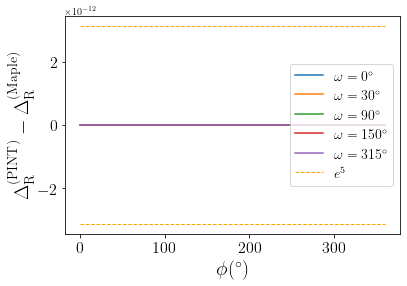

In [25]:
yaxis_str = "$\Delta_\mathrm{R}^{(\mathrm{PINT})} - \Delta_\mathrm{R}^{(\mathrm{Maple})}$"
plot_residuals(Dre_PINT, Dre_Maple, yaxis_str, Phis)

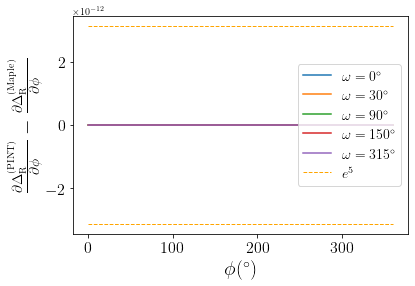

In [26]:
yaxis_str = r"$\frac{\partial\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial\phi} - \frac{\partial\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial\phi}$"
plot_residuals(d_Dre_d_Phi_PINT, d_Dre_d_Phi_Maple, yaxis_str, Phis)

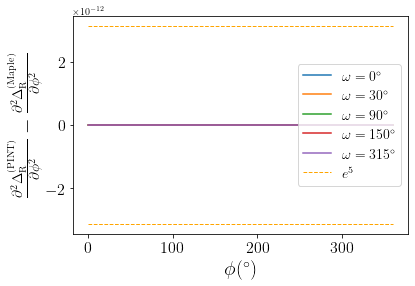

In [27]:
yaxis_str = r"$\frac{\partial^2\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial\phi^2} - \frac{\partial^2\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial\phi^2}$"
plot_residuals(d2_Dre_d2_Phi_PINT, d2_Dre_d2_Phi_Maple, yaxis_str, Phis)

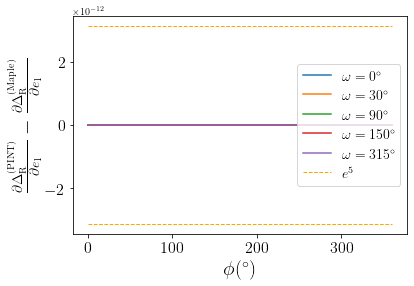

In [28]:
yaxis_str = r"$\frac{\partial\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial e_1} - \frac{\partial\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial e_1}$"
plot_residuals(d_Dre_d_eps1_PINT, d_Dre_d_eps1_Maple, yaxis_str, Phis)

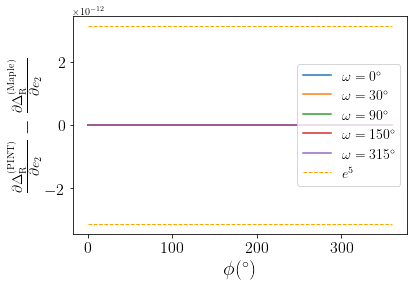

In [29]:
yaxis_str = r"$\frac{\partial\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial e_2} - \frac{\partial\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial e_2}$"
plot_residuals(d_Dre_d_eps2_PINT, d_Dre_d_eps2_Maple, yaxis_str, Phis)

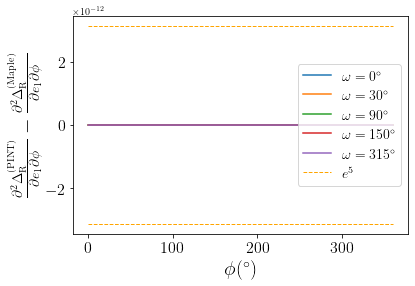

In [30]:
yaxis_str = r"$\frac{\partial^2\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial e_1\partial\phi} - \frac{\partial^2\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial e_1\partial\phi}$"
plot_residuals(d_Dre_d_eps1_PINT, d_Dre_d_eps1_Maple, yaxis_str, Phis)

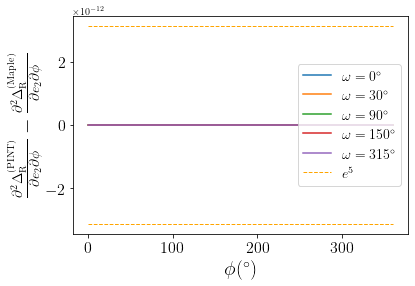

In [31]:
yaxis_str = r"$\frac{\partial^2\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial e_2\partial\phi} - \frac{\partial^2\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial e_2\partial\phi}$"
plot_residuals(d_Dre_d_eps2_PINT, d_Dre_d_eps2_Maple, yaxis_str, Phis)

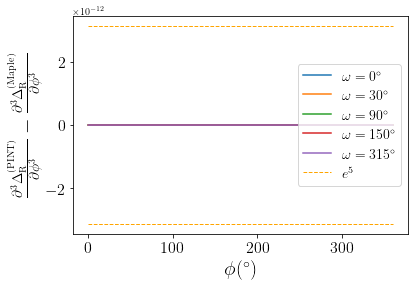

In [32]:
yaxis_str = r"$\frac{\partial^3\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial\phi^3} - \frac{\partial^3\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial\phi^3}$"
plot_residuals(d3_Dre_d3_Phi_PINT, d3_Dre_d3_Phi_Maple, yaxis_str, Phis)

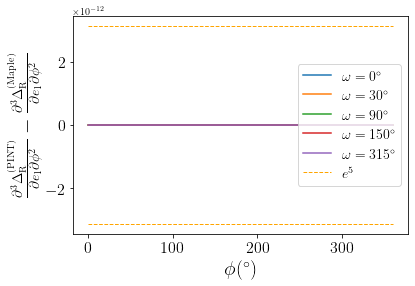

In [33]:
yaxis_str = r"$\frac{\partial^3\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial e_1\partial\phi^2} - \frac{\partial^3\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial e_1\partial\phi^2}$"
plot_residuals(d3_Dre_d2_Phi_d_eps1_PINT, d3_Dre_d2_Phi_d_eps1_Maple, yaxis_str, Phis)

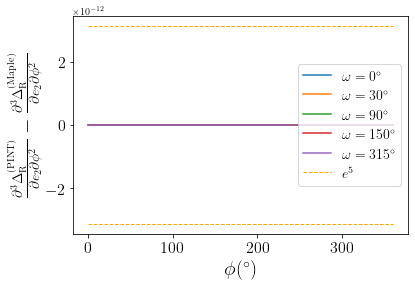

In [34]:
yaxis_str = r"$\frac{\partial^3\Delta_\mathrm{R}^{(\mathrm{PINT})}}{\partial e_2\partial\phi^2} - \frac{\partial^3\Delta_\mathrm{R}^{(\mathrm{Maple})}}{\partial e_2\partial\phi^2}$"
plot_residuals(d3_Dre_d2_Phi_d_eps2_PINT, d3_Dre_d2_Phi_d_eps2_Maple, yaxis_str, Phis)